In [1]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101',
    split=['train[:80%]', 'test[:90%]'],
    with_info=True,
    as_supervised=True,
    data_dir='C:/Users/cesar/Downloads/tensorflow_datasets',
    download=False
)

In [3]:
nombre_clases = dataset_info.features['label'].names

In [4]:
X_train = []
y_train = []
for image, label in train_dataset:
    X_train.append(image.numpy())
    y_train.append(label.numpy())


In [5]:
X_test = []
y_test = []
for image, label in test_dataset:
    X_test.append(image.numpy())
    y_test.append(label.numpy())

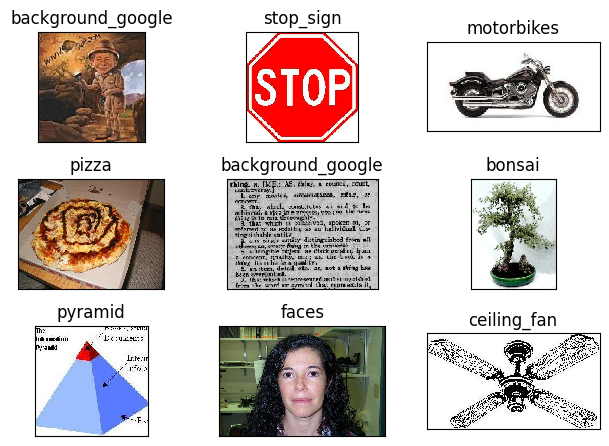

In [6]:
#Mostrar las imágenes
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_test[i], cmap='gray', interpolation='none')
  plt.title(format(nombre_clases[y_test[i]]))
  plt.xticks([])
  plt.yticks([])

In [7]:
from keras.utils import to_categorical  
nb_classes = len(nombre_clases)
print("Antes de categorical", len(y_test))
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Después de categorical", Y_test.shape)

Antes de categorical 5476
Después de categorical (5476, 102)


In [8]:
Y_train.shape

(2447, 102)

In [9]:
def preprocess_image(image):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image

In [10]:
X_train= np.array([preprocess_image(image) for image in X_train])

In [11]:
X_train[225].shape

(224, 224, 3)

In [12]:
X_test= np.array([preprocess_image(image) for image in X_test])
X_test[225].shape

(224, 224, 3)

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),strides=1,activation='relu',input_shape=(224,224,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=1))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(nb_classes, activation='softmax'))

C:\Users\cesar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [15]:
print("X_train original shape", X_test.shape)
print("y_train original shape", len(y_test))
model.fit(X_train, Y_train,
          batch_size=306, epochs=10, verbose=1,
          validation_data=(X_test, Y_test))

X_train original shape (5476, 224, 224, 3)
y_train original shape 5476
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 63s 8s/step - accuracy: 0.0043 - loss: 65.7296 - val_accuracy: 0.0088 - val_loss: 7.4031
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.0162 - loss: 6.1409 - val_accuracy: 0.0301 - val_loss: 4.6272
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 0.0991 - loss: 4.5704 - val_accuracy: 0.0995 - val_loss: 4.4413
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 0.2533 - loss: 4.0320 - val_accuracy: 0.2575 - val_loss: 3.9360
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - accuracy: 0.5507 - loss: 2.6757 - val_accuracy: 0.3161 - val_loss: 3.4955
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 49s 6s/step - accuracy: 0.8241 - loss: 1.2833 - val_accuracy: 0.3751 - val_loss: 3.2230
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.9598 - loss: 0.4304 - val_accuracy: 0.3475 - val_loss: 3.7091
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 

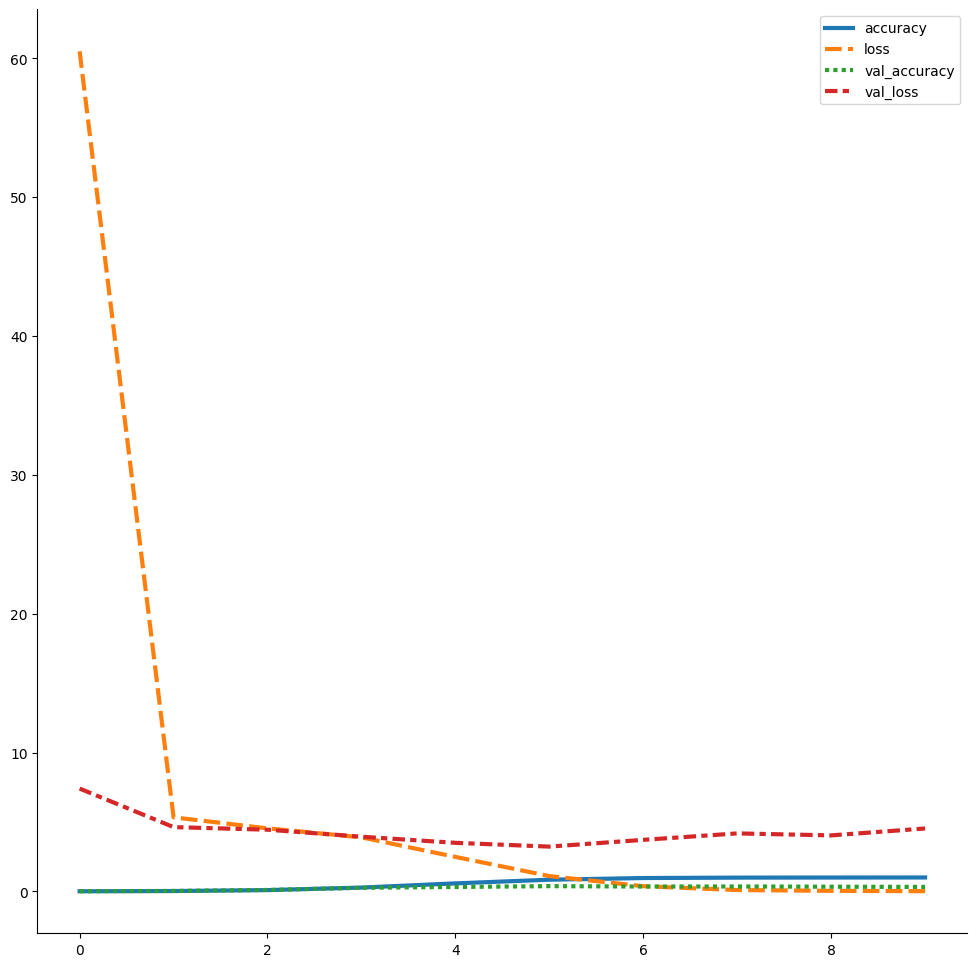

In [16]:
import pandas as pd
import seaborn as sns
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [17]:
nombre_clases[0]

'accordion'

In [18]:
y_test[1]

89

In [20]:
ids=[]
for xt in X_test[:30]:
    xt = np.array([xt])
    predicted_classes = model.predict(xt)
    predicted_label = np.argmax(predicted_classes, axis=1)
    id=predicted_label[0]
    ids.append(id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

In [21]:
X_test[0].shape

(224, 224, 3)

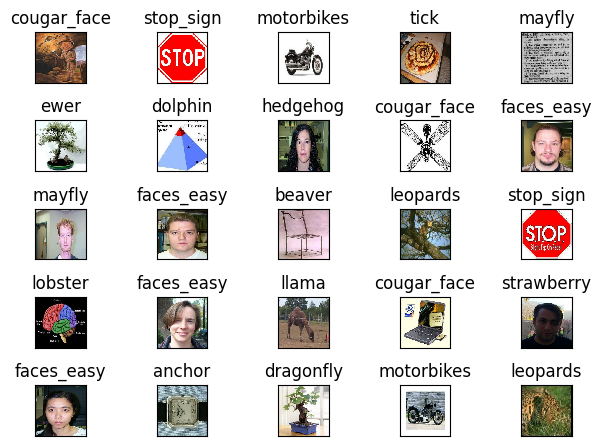

In [22]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(X_test[i], cmap='gray', interpolation='none')
    plt.title(format(nombre_clases[ids[i]]))
    plt.xticks([])
    plt.yticks([])

In [23]:
from PIL import Image


In [24]:
def load_and_transform_image(image_path):
    # Cargar la imagen
    image = Image.open(image_path)
    # Redimensionar la imagen a 224x224
    image = image.resize((224, 224))
    # Convertir la imagen a un array de NumPy
    image_array = np.array(image)
    # Asegurarse de que la imagen tiene 3 canales (RGB)
    if image_array.shape[-1] == 4:
        # Si la imagen tiene un canal alpha (RGBA), eliminarlo
        image_array = image_array[:, :, :3]
    elif image_array.shape[-1] == 1:
        # Si la imagen es en escala de grises, replicar el canal para tener 3 canales
        image_array = np.repeat(image_array, 3, axis=-1)
    return image_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
89
stop_sign


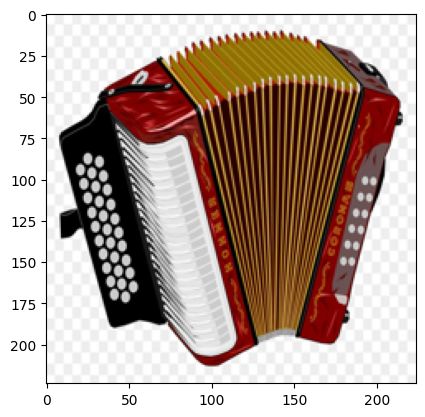

In [25]:
imagen_consulta=load_and_transform_image('./IMAGEN01.jpg')
xt = np.array([imagen_consulta])
predicted_classes = model.predict(xt)
predicted_label = np.argmax(predicted_classes, axis=1)
id=predicted_label[0]
print(id)
print(nombre_clases[id])
plt.imshow(imagen_consulta)
